In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr

In [2]:
exp = 'c96L33_am4p0_qadt_cosp_2010'
year = '201001-201412'

path = '/archive/Youtong.Zheng/awg/2021.02/' + exp + '/gfdl.ncrc3-intel21-prod-openmp/pp/atmos/ts/monthly/5yr/'

f = xr.open_dataset(path + 'atmos.' + year + '.qadt_super.nc')

In [3]:
ffarctic = f.sel(lat = slice(70,90)).mean(dim = 'time').mean(dim = 'lat').mean(dim = 'lon')
ffantarctic = f.sel(lat = slice(-90.,-70)).mean(dim = 'time').mean(dim = 'lat').mean(dim = 'lon')

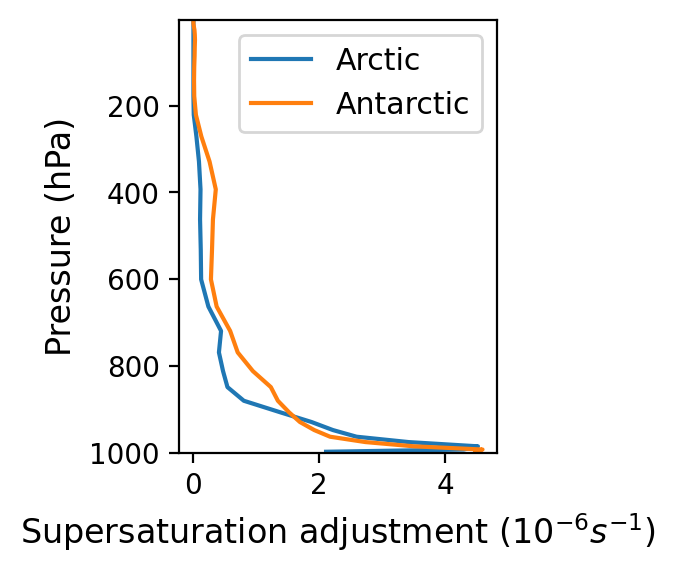

In [5]:
myfontsize = 12
fig, axs = plt.subplots(ncols = 1,
                        nrows = 1,
                        figsize=(6/2.54, 7/2.54), dpi = 200)

plt.tight_layout()

axs.plot((10.**6)*ffarctic.qadt_super, ffarctic.pfull, label = "Arctic")
axs.plot((10.**6)*ffantarctic.qadt_super, ffantarctic.pfull, label = "Antarctic")

axs.set_ylim([1000, 2])
axs.legend(loc = 'best',fontsize=0.9*myfontsize)
axs.set_ylabel('Pressure (hPa)', fontsize=myfontsize) 
axs.set_xlabel('Supersaturation adjustment ($10^{-6}s^{-1}$)', fontsize=myfontsize) 

fig.savefig('Fig1_supersaturation.png', dpi=fig.dpi, bbox_inches='tight')